In [1]:
import pySPM
print(pySPM.__version__)

0.2.21


/Users/AndrewAikawa1/Documents/Beast/particle_tracking/venv/lib/python3.7/site-packages/pySPM/utils/misc.py:135: UserWarning: the library tqdm cannot be found. All progressbar will be disabled.
  warn("the library tqdm cannot be found. All progressbar will be disabled.")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os
from IPython import display

Channels
  - Z
  - LI_X
  - LI_Y
  - Bias
  - V_source
  - Current


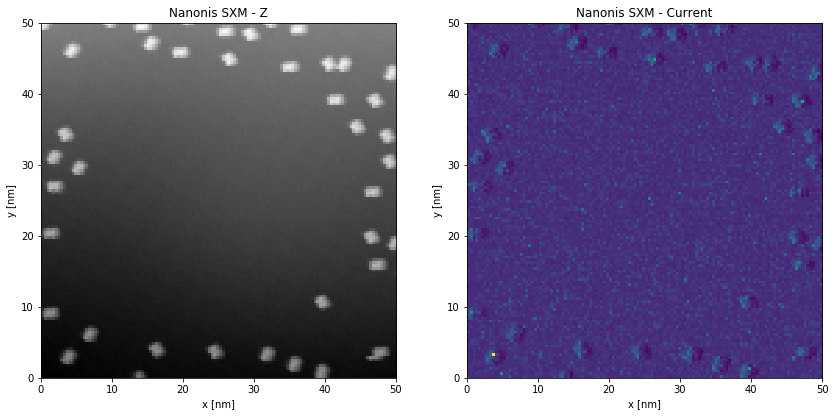

In [14]:
filename = 'hole_closing/Image_954.sxm'
S = pySPM.SXM(filename)
S.list_channels()
fig, ax = plt.subplots(1,2,figsize=(14,7))
S.get_channel('Z').show(ax=ax[0]);
p = S.get_channel('Current').show(ax=ax[1], cmap='viridis');

In [18]:
z_frame = S.get_channel('Z').pixels

In [17]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

In [21]:
import pims
import trackpy as tp

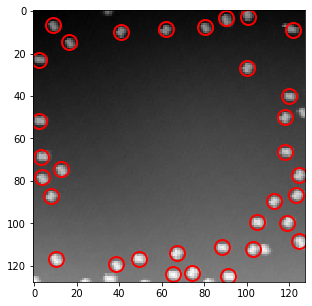

In [197]:
z_frame = (z_frame - np.amin(z_frame))
z_frame_norm_centered = z_frame / (np.amax(z_frame) - np.amin(z_frame))

f = tp.locate(z_frame_norm_centered, 5, minmass=0.4)
tp.annotate(f, z_frame_norm_centered)


In [85]:
from pims import FramesSequence, Frame


class MyReader(FramesSequence):

    def __init__(self, filename):
        self.filename = filename
        self._len = len(os.listdir(filename)) # however many frames there will be
        self._dtype = np.float64 # the numpy datatype of the frames
        self._frame_shape = np.array([512, 512]) # the shape, like (512, 512), of an
                             # individual frame -- maybe get this by
                             # opening the first frame
        # Do whatever setup you need to do to be able to quickly access
        # individual frames later.
        self.frame_names = [os.path.join(filename, image) for image in sorted(os.listdir(filename))]
        
    def get_frame(self, i):
        # Access the data you need and get it into a numpy array.
        # Then return a Frame like so:
        S = pySPM.SXM(self.frame_names[i])
        my_numpy_array = S.get_channel('Z').pixels
        my_numpy_array = (my_numpy_array - np.amin(my_numpy_array)) / (np.amax(my_numpy_array) - np.amin(my_numpy_array))
        return Frame(my_numpy_array, frame_no=i)

    def __len__(self):
     return self._len

    @property
    def frame_shape(self):
     return self._frame_shape

    @property
    def pixel_type(self):
     return self._dtype


In [178]:
frames = MyReader('hole_closing')

In [179]:
f = tp.batch(frames[:], 5, minmass=0.2)

Frame 8: 40 features


In [180]:
t = tp.link_df(f, 15, memory=2)

Frame 8: 40 trajectories present.


In [189]:
t1 = tp.filter_stubs(t, 4)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 67
After: 47


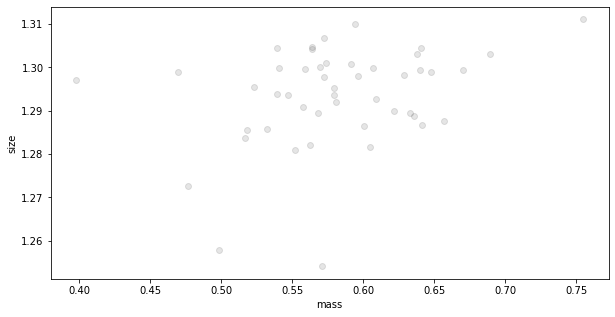

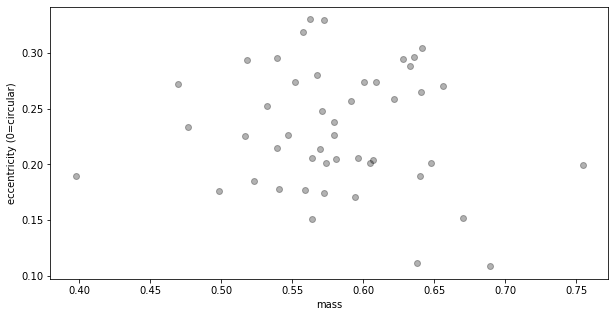

In [190]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass
tp.mass_ecc(t1.groupby('particle').mean()); # 

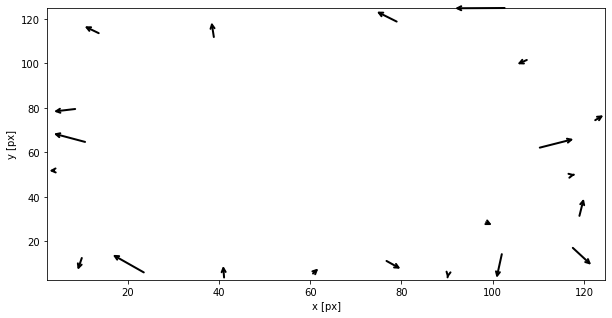

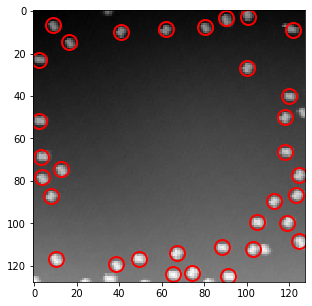

In [199]:
tp.plot_displacements(t1, 0, 1);
tp.annotate(f, z_frame_norm_centered)

1 0


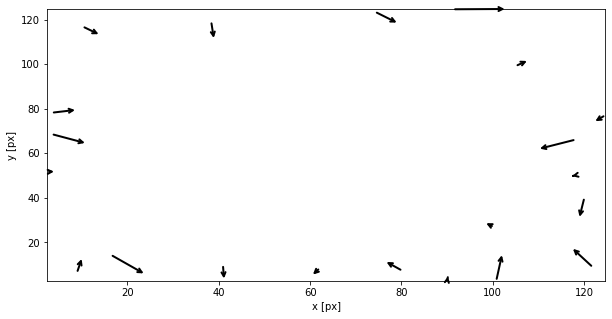

2 0


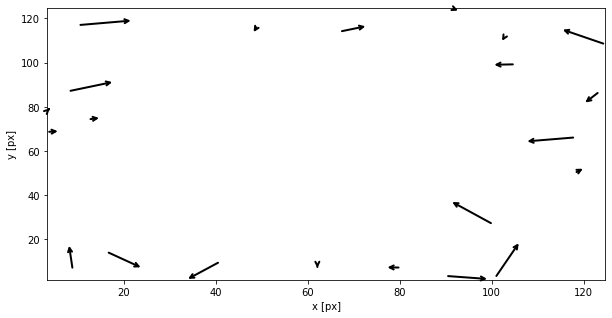

3 0


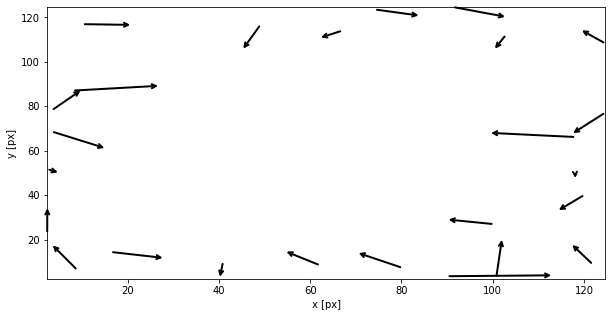

4 0


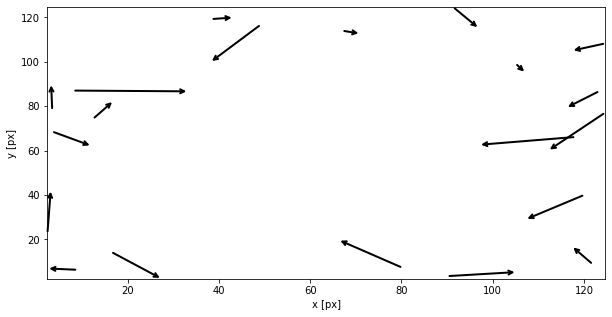

5 0


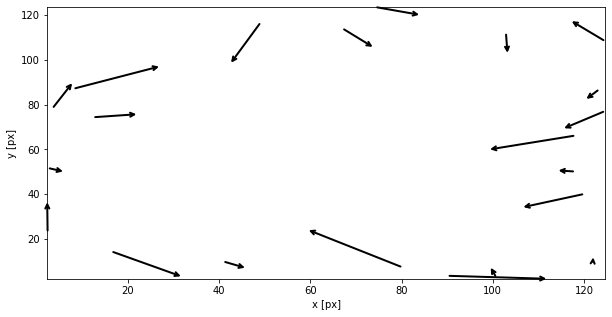

6 0


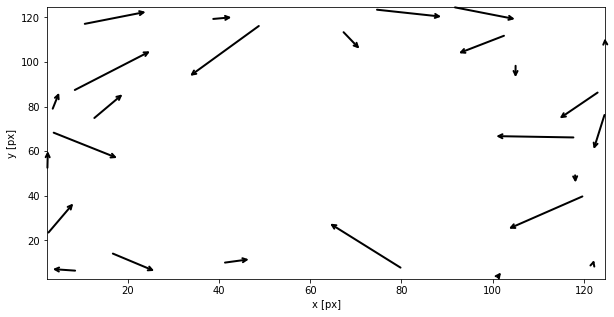

7 0


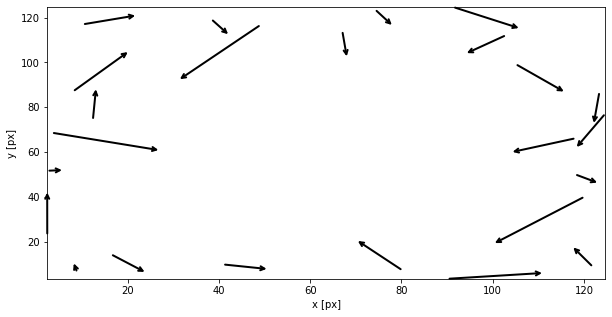

8 0


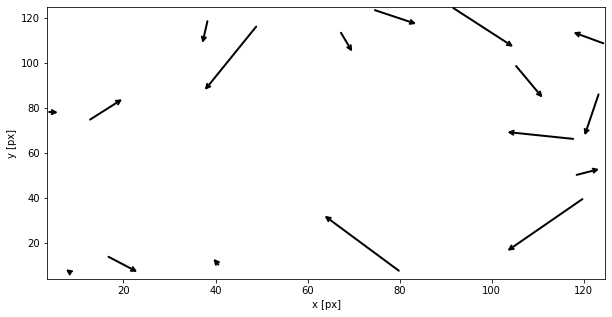

2 1


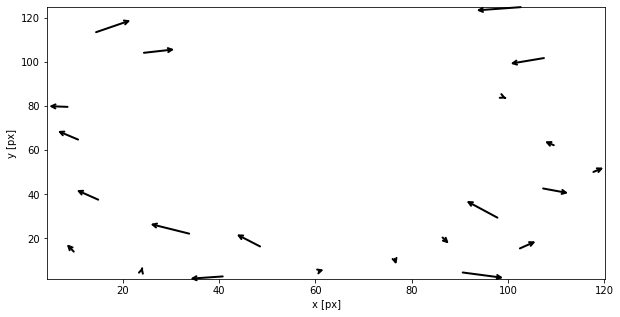

3 1


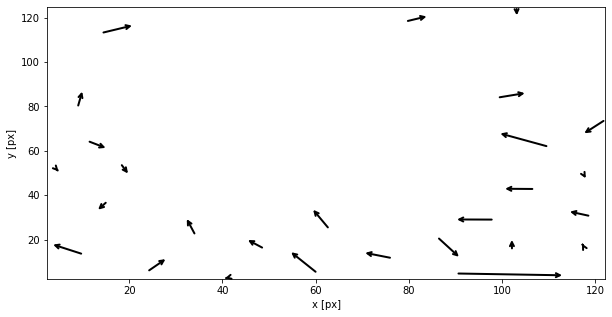

4 1


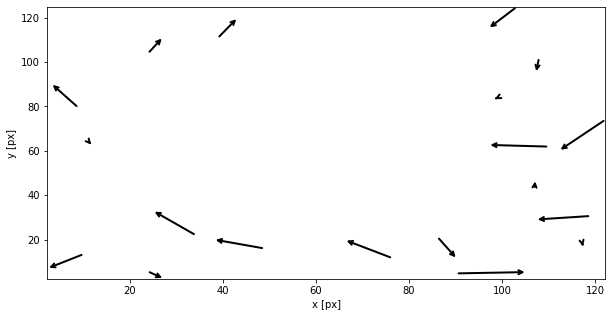

5 1


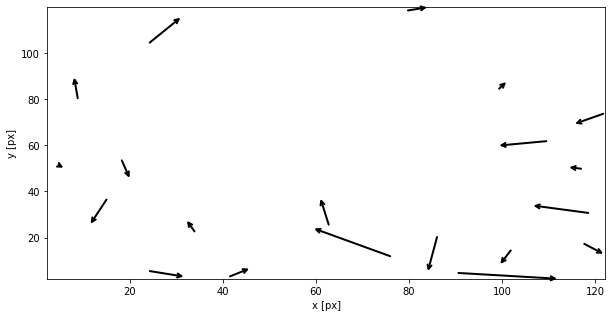

6 1


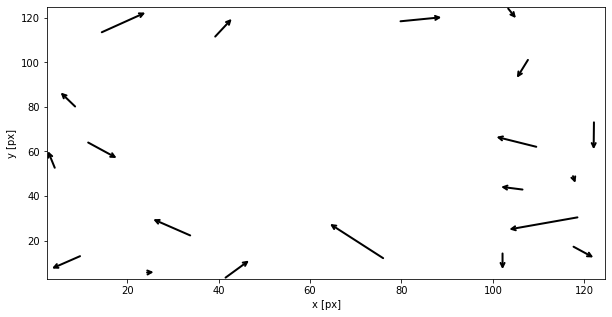

7 1


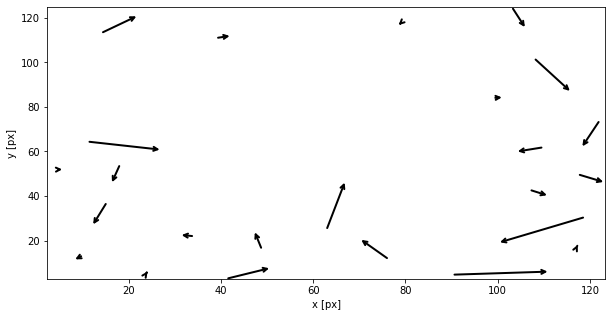

8 1


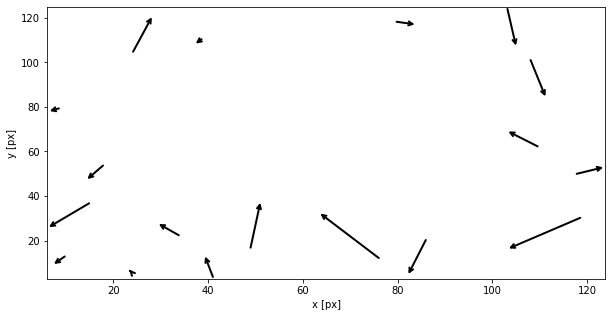

3 2


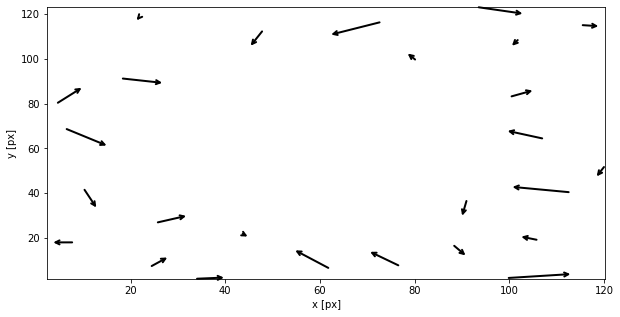

4 2


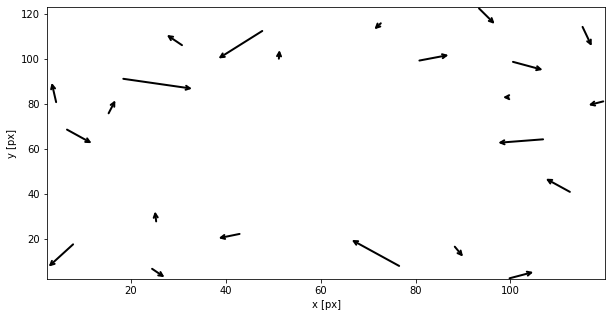

5 2


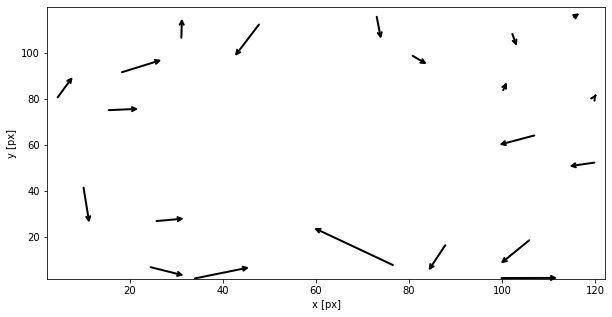

6 2


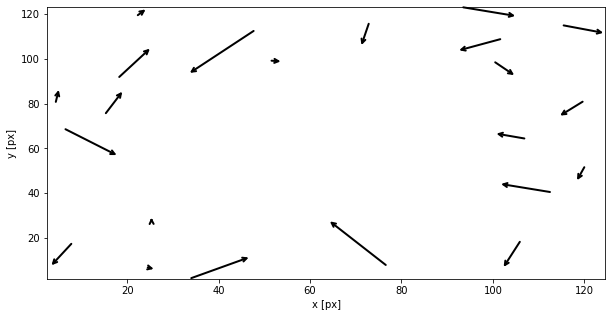

7 2


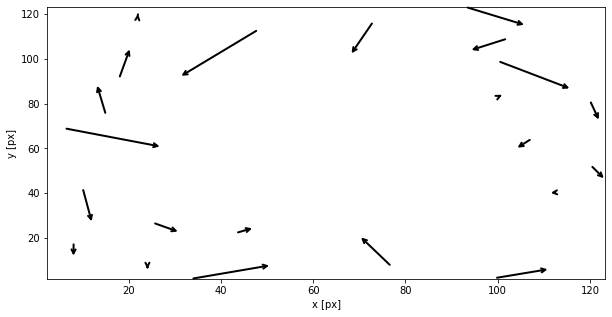

8 2


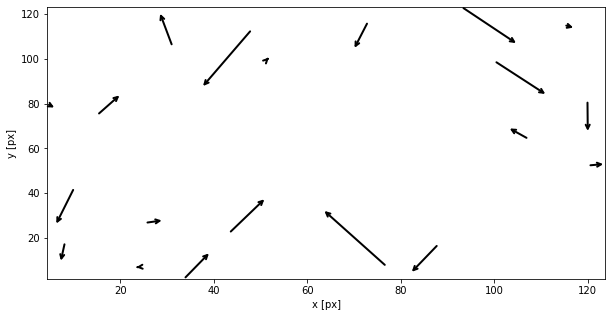

4 3


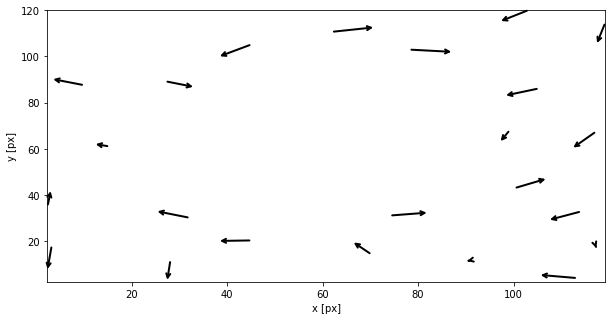

5 3


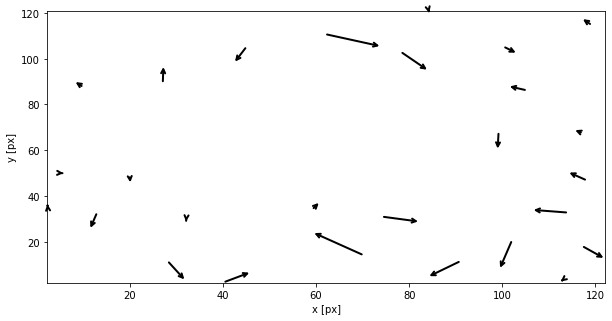

6 3


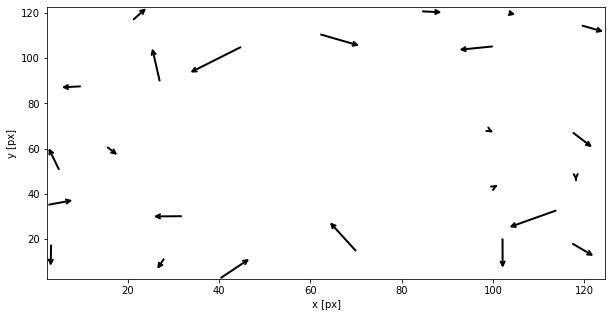

7 3


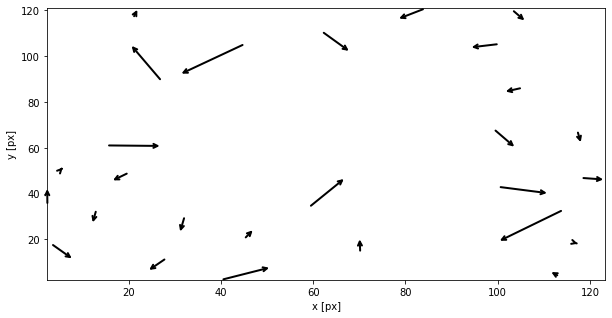

8 3


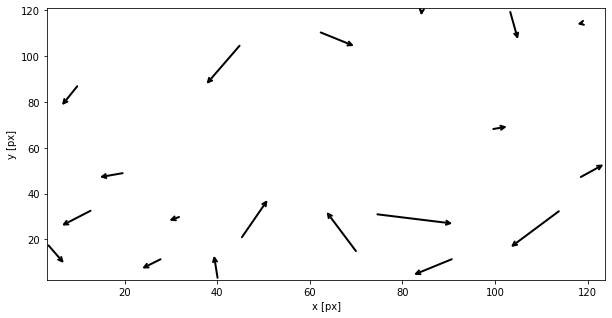

5 4


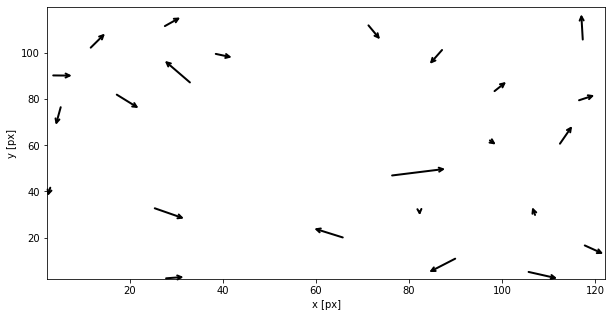

6 4


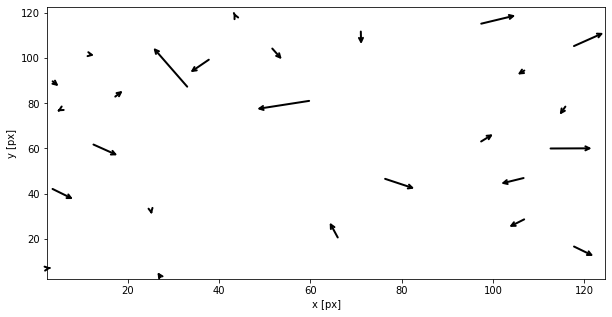

7 4


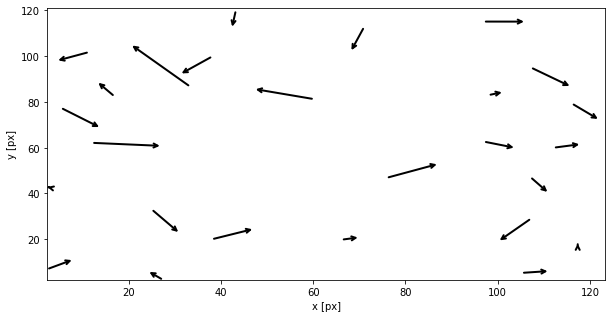

8 4


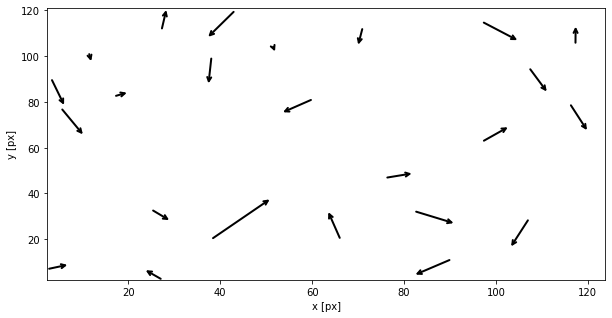

6 5


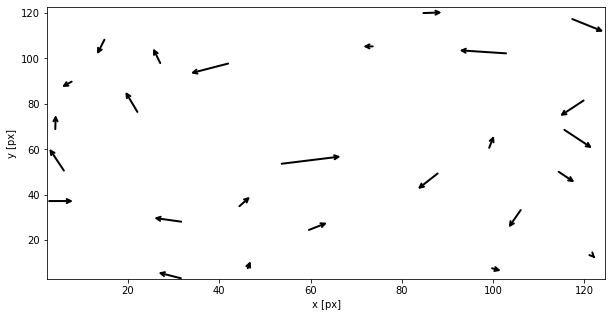

7 5


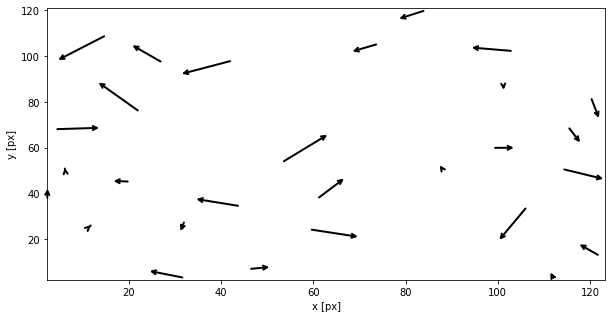

8 5


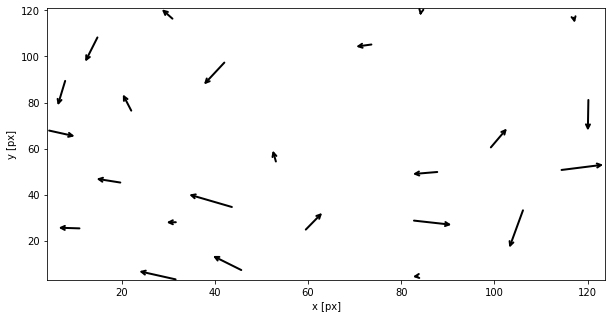

7 6


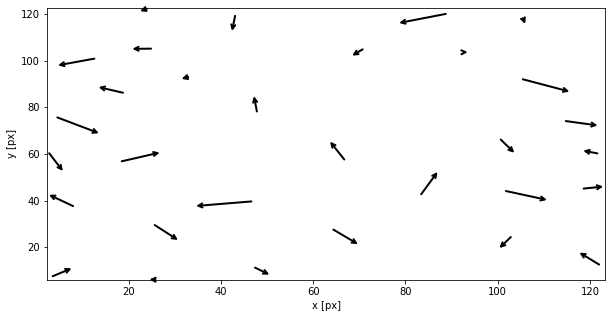

8 6


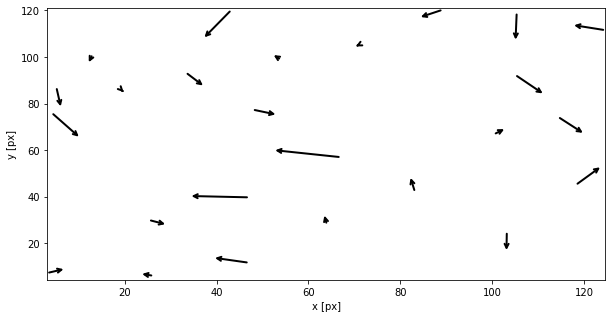

8 7


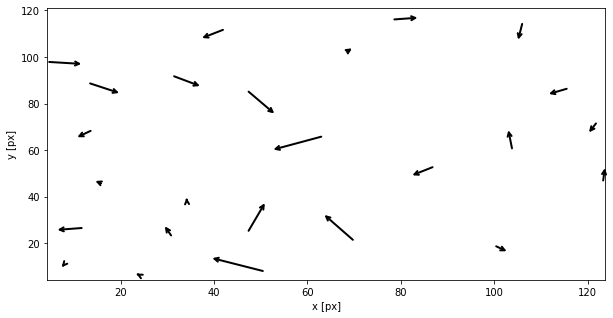

In [200]:
plt.figure()
for i in range(0, 8):
    for j in range(i + 1, 9):
        print(j, i)
        tp.plot_displacements(t1, j, i);
        

In [204]:
tp.relate_frames(t1, 8, 0).dropna()

,x,y,x_b,y_b,dx,dy,dr,direction
particle,,,,,,,,
3,111.321062,83.873868,105.033926,99.218632,-6.287136,15.344764,16.582818,1.959658
16,6.190530,77.925592,3.426589,78.242513,-2.763941,0.316921,2.782051,3.027429
18,20.084737,84.290603,12.377013,74.324305,-7.707723,-9.966298,12.599052,-2.229093
9,37.397177,87.229839,49.110683,116.708150,11.713505,29.478311,31.720294,1.192568
8,69.919757,104.176536,67.028971,114.043456,-2.890786,9.866920,10.281671,1.855798
14,105.042453,106.609080,91.318984,124.700071,-13.723469,18.090990,22.707213,2.219766
10,37.064639,107.860402,38.334918,119.262228,1.270280,11.401826,11.472369,1.459844
5,117.357864,113.783976,124.669903,108.306267,7.312039,-5.477710,9.136259,-0.642948
12,84.016684,116.926486,74.222861,123.582375,-9.793823,6.655890,11.841446,2.544689


In [205]:
import seaborn as sns

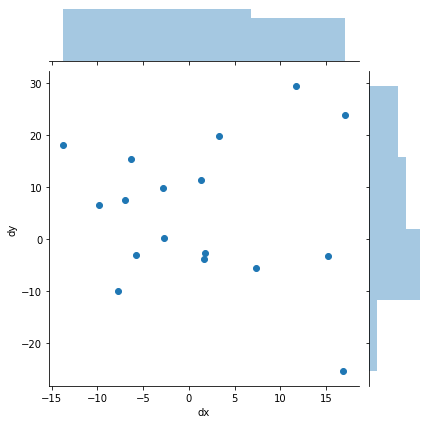

In [208]:
sns.jointplot('dx', 'dy', tp.relate_frames(t1, 8, 0).dropna(), kind='scatter')


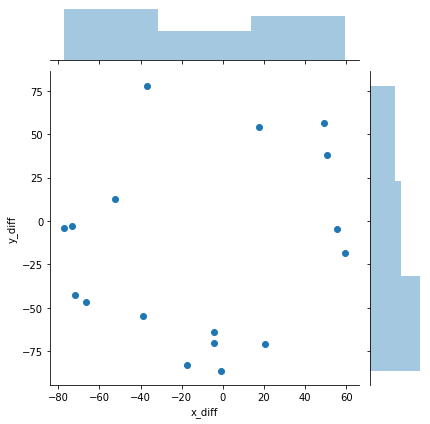

In [219]:
tracks = tp.relate_frames(t1, 8, 0).dropna()
x_center, y_center = 60, 60
tracks['x_diff'] = (x_center - tracks['x_b']) - tracks['dx']
tracks['y_diff'] = (x_center - tracks['y_b']) - tracks['dy']
sns.jointplot('x_diff', 'y_diff', tracks, kind='scatter')


In [218]:
tracks.head()

,x,y,x_b,y_b,dx,dy,dr,direction,x_diff,y_diff
particle,,,,,,,,,,
3,111.321062,83.873868,105.033926,99.218632,-6.287136,15.344764,16.582818,1.959658,-38.746789,-54.563396
16,6.190530,77.925592,3.426589,78.242513,-2.763941,0.316921,2.782051,3.027429,59.337352,-18.559434
18,20.084737,84.290603,12.377013,74.324305,-7.707723,-9.966298,12.599052,-2.229093,55.330710,-4.358006
9,37.397177,87.229839,49.110683,116.708150,11.713505,29.478311,31.720294,1.192568,-0.824188,-86.186461
8,69.919757,104.176536,67.028971,114.043456,-2.890786,9.866920,10.281671,1.855798,-4.138185,-63.910376


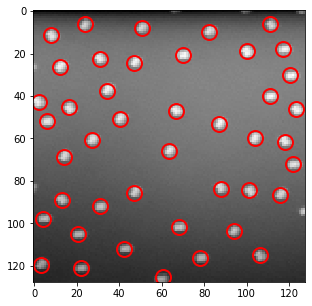

In [221]:
f = tp.locate(frames[7], 5, minmass=0.2)
tp.annotate(f[f['frame'] == 7], frames[7])